In [9]:
import control
import numpy as np
import control.matlab as cmat
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [10]:
#const
r10 = 10**4
rdac = 3.3 * 10**3
rchip = 11

ca = 0.1 * 10**-6
cx = 100 * 10**-12
cn = 50 * 10 **-12

#c level_options = n
n = 1
s = control.tf('s')

# Para una opcion de carga

In [11]:
num = cx*s
den = ((1-1/(rchip*s*ca))*(cx*s+1/rdac+ca*s)-ca*s)*rchip
hs = num/den
print(hs)
print(control.tf2ss(hs))


             1.1e-16 s^2
-------------------------------------
1.21e-15 s^2 - 1.097e-06 s - 0.003333

A = [[9.06969697e+08 2.75482094e+12]
     [1.00000000e+00 0.00000000e+00]]

B = [[1.]
     [0.]]

C = [[8.24517906e+07 2.50438267e+11]]

D = [[0.09090909]]



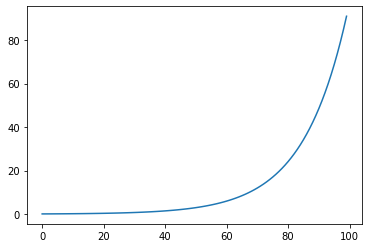

In [12]:
t, y = control.step_response(hs)
plt.plot(y)

#  N opciones de carga

In [13]:
if len(capacitors) != 0 :
    alpha = cx*s+1/rdac+ca*s
    for i in capacitors:
        alpha = alpha + i*s 

    omega = 0
    for i in capacitors:
        omega = ((i*s)**2)/(i*s-1/r10) + omega


    beta = (1-1/(s*ca*rchip))*alpha-ca*s-(1-1/(s*ca*rchip))*omega

    hs = (cx*s)/(rchip*beta)
    print("===================== TF PARA CASO N CARGAS ===================== ")
    print(hs)
    print("================================================================= ")
    print("")
    print("===================== SS PARA CASO N CARGAS ===================== ")
    print(control.tf2ss(hs))
    print("================================================================= ")
    
else:
    alpha = cx*s+1/rdac+ca*s   
    beta = (1-1/(s*ca*rchip))*alpha-ca*s
    hs = (cx*s)/(rchip*beta)
    print("===================== TF PARA CASO 1 CARGA ===================== ")
    print(hs)
    print("================================================================= ")
    print("")
    print("===================== SS PARA CASO 1 CARGAS ===================== ")
    print(control.tf2ss(hs))
    print("================================================================= ")

NameError: name 'capacitors' is not defined

In [15]:
alpha = cx*s+1/rdac+ca*s   
beta = (1-1/(s*ca*rchip))*alpha-ca*s
hs = (cx*s)/(rchip*beta)
print(hs)


             1.1e-16 s^2
-------------------------------------
1.21e-15 s^2 - 1.097e-06 s - 0.003333



# Caso 2: solo 2 opciones de carga

In [16]:
req = 1/rdac + 1/(1/(ca*s)+rchip) + 1/(1/(cn*s)+r10)
hs = 1/req - 1/(1/(cx*s)+rdac) - (rdac/(1/(cx*s)+rdac))/(1/(cn*s)+r10)

In [ ]:
hs

In [ ]:
t,y = (control.step_response(hs))

In [ ]:
plt.plot(y)

In [ ]:
#_________________

In [ ]:
from itertools import cycle

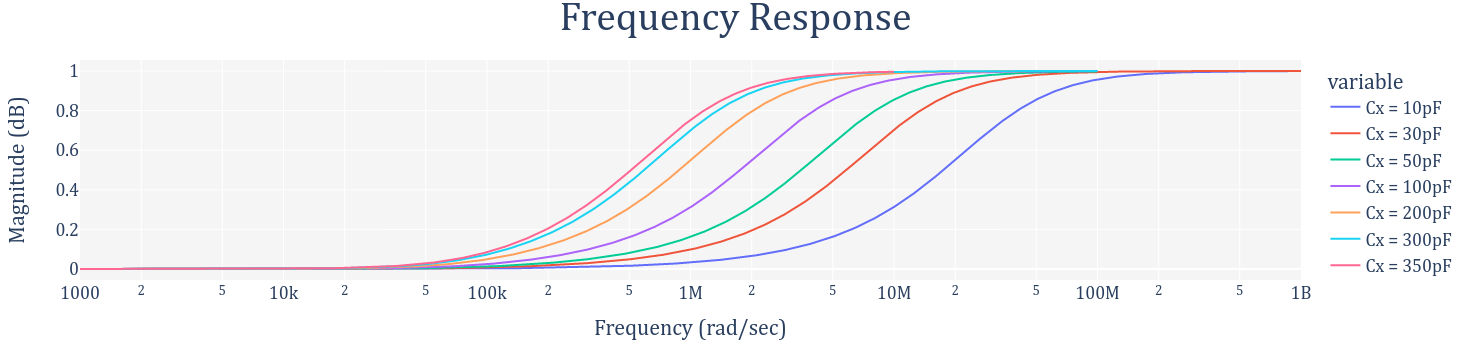

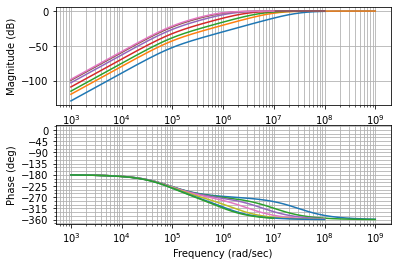

In [17]:
from itertools import cycle
c=10*10**-12
s = control.tf('s')

cs = [10,30,50,100,200,300,350]
df = pd.DataFrame()
for i in cs:
    #filtro 1
    r1=3.3*10**3
    c1=i*10**-12
    h1=s/(s+1/(r1*c1))

    #filtro 2
    r2=11
    c2=10**-6
    h2=s/(s+1/(r2*c2))


    #total
    hs = control.series(h1,h2)

    t, y = control.step_response(hs)
    plt.plot(y)
    control.bode_plot(hs)  # = h1, h2
    # Create the pandas DataFrame
    #df[str(i)+"pF"] = y
    dfx=pd.DataFrame(y, columns=[str(i)+"pF"])
    df_bode=pd.DataFrame(np.array(control.bode_plot(hs, plot=False)).transpose())
    df_bode.columns = ['Col_1', 'Col_2', 'Col_3']
    
    if i == 10:
        fig = px.line(df_bode, x ='Col_3', y = ['Col_1'], log_x=True,labels={
                     "Frecuency": "Frecuency (rad/sec)",
                     "Magnitude": "Magnitude (dB)"
                 },)
    else:
        fig.add_scatter(x = df_bode['Col_3'],y = df_bode['Col_1'])
        

    #df.append(dfx,ignore_index = True)
    #
    #df.append(dfx,ignore_index = True)
    #dfx.to_excel('tesis_pulse_response_' + str(i)+"pF"+'.xlsx')
    #df_bode.to_excel('bode_sys_' + str(i)+"pF"+'.xlsx')
    
fig.layout.title.text = 'Frequency Response'
fig.update_layout(
    #showlegend=False,
    plot_bgcolor="#f5f5f5",
    #margin=dict(t=10,l=10,b=10,r=10)
    title_x=0.5,
    #title_font_family="Old Standard TT",
    #legend_font_family="Old Standard TT",
    font_family="Cambria",
    font_size = 18,
    title_font_size=40
    
)

names = cycle(["Cx = 10pF", 'Cx = 30pF','Cx = 50pF', 'Cx = 100pF','Cx = 200pF', 'Cx = 300pF','Cx = 350pF'])
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(title_text="Frequency (rad/sec)")
fig.update_yaxes(title_text="Magnitude (dB)")

fig.write_image("frec.pdf",width=0.8*1500, height=0.3*1500, scale=1)
fig.show()

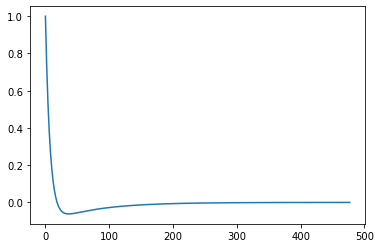

In [18]:
t, y = control.step_response(hs)
plt.plot(y)

In [ ]:
t, y = control.step_response(hs)
plt.plot(y)

In [ ]:
h1

In [ ]:
h2

In [ ]:
control.series(h1,h2)

In [ ]:
h1*h2

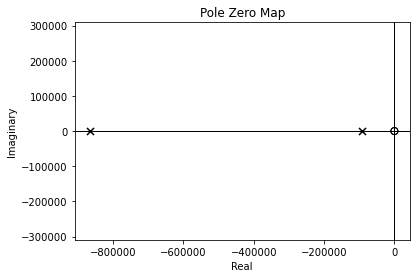

In [19]:
control.pzmap(hs)  # = h1, h2
plt.savefig("zmap.pdf")

In [ ]:
pd.DataFrame(control.bode_plot(hs))  # = h1, h2

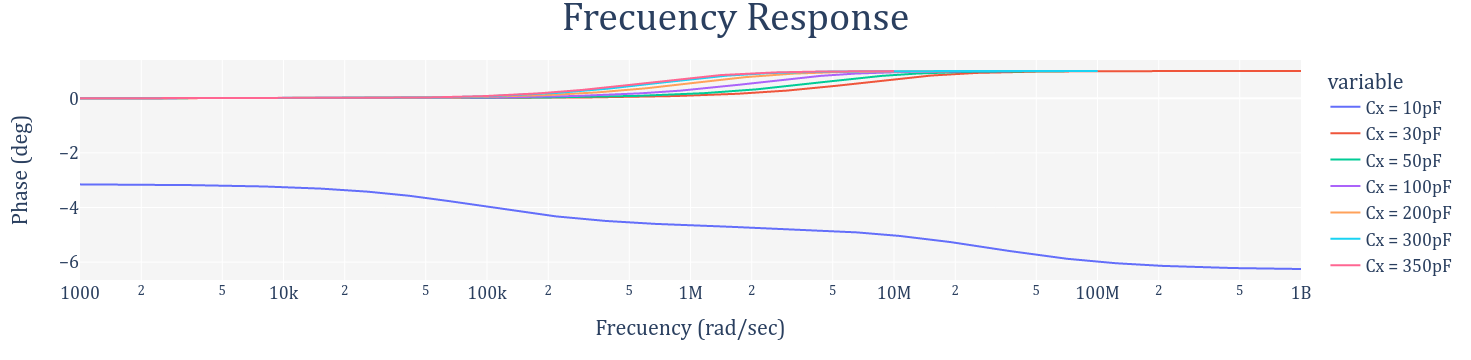

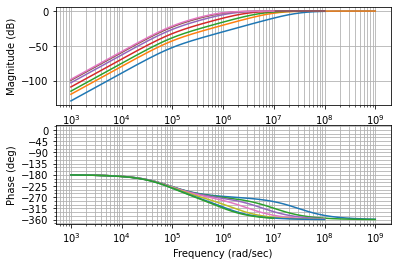

In [20]:
from itertools import cycle
c=10*10**-12
s = control.tf('s')

cs = [10,30,50,100,200,300,350]
df = pd.DataFrame()
for i in cs:
    #filtro 1
    r1=3.3*10**3
    c1=i*10**-12
    h1=s/(s+1/(r1*c1))

    #filtro 2
    r2=11
    c2=10**-6
    h2=s/(s+1/(r2*c2))


    #total
    hs = control.series(h1,h2)

    t, y = control.step_response(hs)
    plt.plot(y)
    control.bode_plot(hs)  # = h1, h2
    # Create the pandas DataFrame
    #df[str(i)+"pF"] = y
    dfx=pd.DataFrame(y, columns=[str(i)+"pF"])
    df_bode=pd.DataFrame(np.array(control.bode_plot(hs, plot=False)).transpose())
    df_bode.columns = ['Col_1', 'Col_2', 'Col_3']
    
    if i == 10:
        fig = px.line(df_bode, x ='Col_3', y = ['Col_2'], log_x=True,labels={
                     "Frecuency": "Frecuency (rad/sec)",
                     "Magnitude": "Magnitude (dB)"
                 },)
    else:
        fig.add_scatter(x = df_bode['Col_3'],y = df_bode['Col_1'])
        

    #df.append(dfx,ignore_index = True)
    #
    #df.append(dfx,ignore_index = True)
    #dfx.to_excel('tesis_pulse_response_' + str(i)+"pF"+'.xlsx')
    #df_bode.to_excel('bode_sys_' + str(i)+"pF"+'.xlsx')
    
fig.layout.title.text = 'Frecuency Response'
fig.update_layout(
    #showlegend=False,
    plot_bgcolor="#f5f5f5",
    #margin=dict(t=10,l=10,b=10,r=10)
    title_x=0.5,
    #title_font_family="Old Standard TT",
    #legend_font_family="Old Standard TT",
    font_family="Cambria",
    font_size = 18,
    title_font_size=40
    
)

names = cycle(["Cx = 10pF", 'Cx = 30pF','Cx = 50pF', 'Cx = 100pF','Cx = 200pF', 'Cx = 300pF','Cx = 350pF'])
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(title_text="Frecuency (rad/sec)")
fig.update_yaxes(title_text="Phase (deg)")

fig.write_image("phase.pdf",width=0.8*1500, height=0.3*1500, scale=1)
fig.show()

# Circuit spice data

In [ ]:
data = pd.read_csv('run1.csv')

In [ ]:
plt.plot(data["time"],data["V(n011)"])

In [ ]:
plt.plot(data["time"],data["V(n010)"])

In [ ]:
plt.plot(data["time"],data["V(n014)"])

In [ ]:
plt.plot(data["time"],data["I(Rchip2)"])

### Control signals

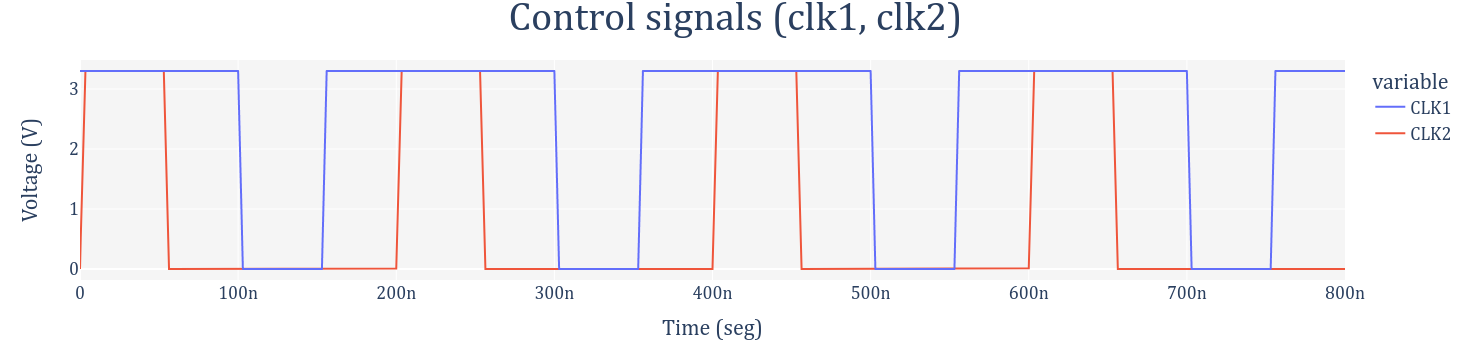

In [24]:
fig = px.line(data, x ='time', y = ['V(n010)'])
fig.add_scatter(x = data['time'],y = data['V(n014)'])

    #df.append(dfx,ignore_index = True)
    #
    #df.append(dfx,ignore_index = True)
    #dfx.to_excel('tesis_pulse_response_' + str(i)+"pF"+'.xlsx')
    #df_bode.to_excel('bode_sys_' + str(i)+"pF"+'.xlsx')
    
fig.layout.title.text = 'Control signals (clk1, clk2)'
fig.update_layout(
    #showlegend=False,
    plot_bgcolor="#f5f5f5",
    #margin=dict(t=10,l=10,b=10,r=10)
    title_x=0.5,
    #title_font_family="Old Standard TT",
    #legend_font_family="Old Standard TT",
    font_family="Cambria",
    font_size = 18,
    title_font_size=40
    
)

names = cycle(["CLK1", 'CLK2'])
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(title_text="Time (seg)")
fig.update_yaxes(title_text="Voltage (V)")

fig.write_image("spice-control-sig.pdf",width=0.8*1500, height=0.3*1500, scale=1)
fig.write_image("spice-control-sig.svg",width=0.8*1500, height=0.3*1500, scale=1)
fig.show()

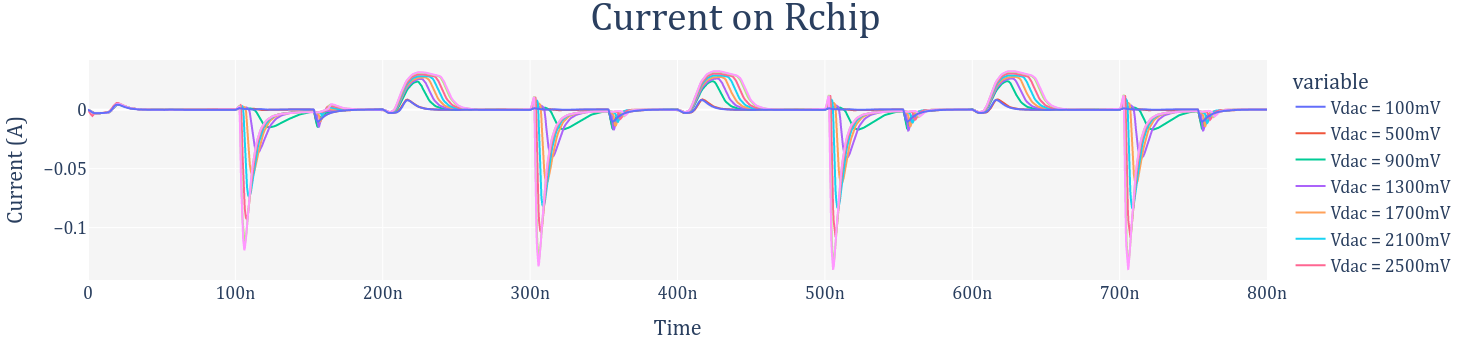

In [26]:
for i in [1,3,5,7,9,11,13,15,16]:
    data = pd.read_csv("run"+str(i)+".csv")
    
    if i == 1:
        fig = px.line(data, x ='time', y = ['I(Rchip2)'])
    else:
        fig.add_scatter(x = data['time'],y = data['I(Rchip2)'])

fig.layout.title.text = 'Current on Rchip'
fig.update_layout(
    #showlegend=False,
    plot_bgcolor="#f5f5f5",
    #margin=dict(t=10,l=10,b=10,r=10)
    title_x=0.5,
    #title_font_family="Old Standard TT",
    #legend_font_family="Old Standard TT",
    font_family="Cambria",
    font_size = 18,
    title_font_size=40
    
)

#names = cycle(["Vdac = 100mV", "Vdac = 300mV","Vdac = 500mV","Vdac = 700mV","Vdac = 900mV","Vdac = 1100mV","Vdac = 1300mV","Vdac = 1500mV","Vdac = 1700mV","Vdac = 1900mV","Vdac = 2100mV","Vdac = 2300mV","Vdac = 2500mV","Vdac = 2700mV","Vdac = 2900mV","Vdac = 3000mV"])
names = cycle(["Vdac = 100mV","Vdac = 500mV","Vdac = 900mV","Vdac = 1300mV","Vdac = 1700mV","Vdac = 2100mV","Vdac = 2500mV","Vdac = 2900mV","Vdac = 3000mV"])
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="Current (A)")

fig.write_image("spice-current-sig.pdf",width=0.8*1500, height=0.3*1500, scale=1)
fig.write_image("spice-current-sig.svg",width=0.8*1500, height=0.3*1500, scale=1)
fig.show()

In [ ]:
for i in [1,3,5,7,9,11,13,15,16]:
    data = pd.read_csv("run"+str(i)+".csv")
    
    if i == 1:
        fig = px.line(data, x ='time', y = ['V(n011)'])
    else:
        fig.add_scatter(x = data['time'],y = data['V(n011)'])
        
fig.layout.title.text = 'Chargin Voltage Cx'
fig.update_layout(
    #showlegend=False,
    plot_bgcolor="#f5f5f5",
    #margin=dict(t=10,l=10,b=10,r=10)
    title_x=0.5,
    #title_font_family="Old Standard TT",
    #legend_font_family="Old Standard TT",
    font_family="Cambria",
    font_size = 18,
    title_font_size=40
    
)

#names = cycle(["Vdac = 100mV", "Vdac = 300mV","Vdac = 500mV","Vdac = 700mV","Vdac = 900mV","Vdac = 1100mV","Vdac = 1300mV","Vdac = 1500mV","Vdac = 1700mV","Vdac = 1900mV","Vdac = 2100mV","Vdac = 2300mV","Vdac = 2500mV","Vdac = 2700mV","Vdac = 2900mV","Vdac = 3000mV"])
names = cycle(["Vdac = 100mV","Vdac = 500mV","Vdac = 900mV","Vdac = 1300mV","Vdac = 1700mV","Vdac = 2100mV","Vdac = 2500mV","Vdac = 2900mV","Vdac = 3000mV"])
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(title_text="Time (seg)")
fig.update_yaxes(title_text="Voltage (V)")

fig.write_image("spice-voltage-sig.pdf",width=0.8*1500, height=0.3*1500, scale=1)
fig.show()